In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("/content/drive/My Drive/Crime_Data_from_2010_to_2019.csv")
#dataset.drop(['DATE OCC','AREA NAME','Crm Cd Desc','Vict Sex','LAT','LON','DR_NO','Vict Age','Vict Descent','Part 1-2','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Date Rptd','TIME OCC','Rpt Dist No','Mocodes','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status', 'Status Desc','LOCATION','Cross Street'],axis = 1, inplace = True)
dataset

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117584,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2117585,190715222,08/15/2019 12:00:00 AM,08/14/2019 12:00:00 AM,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2117586,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2117587,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [ ]:
dataset['DATE OCC'] = pd.to_datetime(dataset['DATE OCC'])
dataset.drop(['AREA NAME','AREA ','Crm Cd','Vict Sex','LAT','LON','DR_NO','Vict Age','Vict Descent','Part 1-2','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Date Rptd','TIME OCC','Rpt Dist No','Mocodes','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status', 'Status Desc','LOCATION','Cross Street'],axis = 1, inplace = True)


In [ ]:
split_date=pd.to_datetime('2017,31,12')
train=dataset[dataset['DATE OCC']<=split_date]
test=dataset[dataset['DATE OCC']>split_date]
one_year=dataset.tail(365*9)
one_year


,DATE OCC,Crm Cd Desc
2114304,2019-12-17,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)"
2114305,2019-10-04,VEHICLE - STOLEN
2114306,2019-01-26,VEHICLE - STOLEN
2114307,2019-01-14,INTIMATE PARTNER - SIMPLE ASSAULT
2114308,2019-12-12,BURGLARY
...,...,...
2117584,2019-03-28,ARSON
2117585,2019-08-14,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)
2117586,2019-01-06,CRIMINAL THREATS - NO WEAPON DISPLAYED
2117587,2019-10-16,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


In [ ]:
train = train.rename(columns={'Crm Cd Desc':'OCCURENCES'}) 
test = test.rename(columns={'Crm Cd Desc':'OCCURENCES'}) 
dataset = dataset.rename(columns={'Crm Cd Desc':'OCCURENCES'}) 

In [ ]:
train = pd.pivot_table(train, index=['DATE OCC'], aggfunc='count')
test= pd.pivot_table(test, index=['DATE OCC'], aggfunc='count')
dataset= pd.pivot_table(dataset, index=['DATE OCC'], aggfunc='count')
one_year= pd.pivot_table(one_year, index=['DATE OCC'], aggfunc='count')

In [ ]:
one_year=dataset.tail(365*2)
one_year

,OCCURENCES
DATE OCC,
2018-01-01,1137
2018-01-02,547
2018-01-03,581
2018-01-04,541
2018-01-05,660
...,...
2019-12-27,511
2019-12-28,561
2019-12-29,526


In [ ]:
train1=train.reset_index()
test1=test.reset_index()
test1


,DATE OCC,OCCURENCES
0,2017-12-02,624
1,2017-12-03,595
2,2017-12-04,602
3,2017-12-05,587
4,2017-12-06,587
...,...,...
755,2019-12-27,511
756,2019-12-28,561
757,2019-12-29,526
758,2019-12-30,537


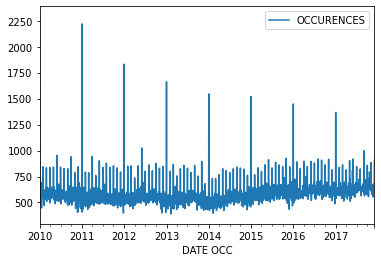

In [ ]:
import matplotlib.pyplot as plt
train.plot()
plt.show()

In [ ]:
dataset = dataset.rename(columns={'Crm Cd Desc':'OCCURENCES'}) 
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['OCCURENCES'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.300632
p-value: 0.171764
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
train_log=np.sqrt(train['OCCURENCES'])
train_log

DATE OCC
2010-01-01    47.885280
2010-01-02    23.130067
2010-01-03    23.216374
2010-01-04    23.622024
2010-01-05    23.409400
                ...    
2017-11-27    24.637370
2017-11-28    25.298221
2017-11-29    25.337719
2017-11-30    24.186773
2017-12-01    30.149627
Name: OCCURENCES, Length: 2892, dtype: float64

In [ ]:
test_log=np.sqrt(test['OCCURENCES'])
#test_diff=test_log.diff().dropna()
test_log

DATE OCC
2017-12-02    24.979992
2017-12-03    24.392622
2017-12-04    24.535688
2017-12-05    24.228083
2017-12-06    24.228083
                ...    
2019-12-27    22.605309
2019-12-28    23.685439
2019-12-29    22.934690
2019-12-30    23.173260
2019-12-31    23.473389
Name: OCCURENCES, Length: 760, dtype: float64

In [ ]:
df_log=np.log(dataset['OCCURENCES'])
df_diff=df_log.diff().dropna()
df_diff

DATE OCC
2010-01-02   -1.455350
2010-01-03    0.007449
2010-01-04    0.034643
2010-01-05   -0.018084
2010-01-06   -0.029632
                ...   
2019-12-27    0.064669
2019-12-28    0.093351
2019-12-29   -0.064420
2019-12-30    0.020697
2019-12-31    0.025737
Name: OCCURENCES, Length: 3651, dtype: float64

In [ ]:
result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -28.499456
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
import pmdarima as pm
from pmdarima.arima import auto_arima

# Fit the model
model1 = pm.auto_arima(dataset, error_action='ignore', suppress_warnings=True)

# Print the optimal values of p, d, and q
print(f'Optimal values: p={model1.order[0]}, d={model1.order[1]}, q={model1.order[2]}')

Optimal values: p=0, d=1, q=1


In [ ]:
train_model=train_log.to_numpy()
test_model=test_log.to_numpy()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# D = dataset_diff.values
# size = int(len(D) * 0.66)
# train, test = D[0:size], D[size:len(D)]
history = [x for x in train_model]
predictions = list()
for t in range(len(test_model)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_model[t]
    history.append(obs)
    #print('predicted= %f, expected = %f' %(yhat,obs))
    
error = mean_squared_error(test_model, predictions)
print(' Test MSE : %3f' %error)


 Test MSE : 1.272471


In [ ]:
from sklearn.metrics import mean_absolute_error
error_MAE = mean_absolute_error(test_model, predictions)
print(' Test MAE : %3f' %error_MAE)

 Test MAE : 0.769418


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
error_MAPE = mean_absolute_percentage_error(test_model, predictions)
print(' Test MAPE : %3f' %error_MAPE)

 Test MAPE : 0.030812


In [ ]:
test_actual=np.square(test_model)
predictions_actual=np.square(predictions)
# plt.plot(test_model)
# plt.plot(predictions, color= 'red')
# plt.show()

In [ ]:
predictions_df=pd.DataFrame(predictions_actual)
predictions_df=pd.merge(test1,predictions_df,left_index=True, right_index=True)
column_names = predictions_df.columns.tolist()

# Replace the name of the third column with a new name
column_names[2] = 'Predicted'

# Rename the columns of the dataframe
df = predictions_df.rename(columns={column_names[i]: column_names[i] for i in range(len(column_names))})
predictions_df.rename(columns={0:'predicted'})

,DATE OCC,OCCURENCES,predicted
0,2017-12-02,624,644.442845
1,2017-12-03,595,644.017152
2,2017-12-04,602,642.985678
3,2017-12-05,587,642.126645
4,2017-12-06,587,640.964542
...,...,...,...
755,2019-12-27,511,581.380342
756,2019-12-28,561,579.745532
757,2019-12-29,526,579.318171
758,2019-12-30,537,578.077912


In [ ]:
predictions_df.drop(['OCCURENCES'],axis = 1, inplace = True)

In [ ]:
predictions_df.rename(columns={0:'predicted'})

,DATE OCC,predicted
0,2017-12-02,644.442845
1,2017-12-03,644.017152
2,2017-12-04,642.985678
3,2017-12-05,642.126645
4,2017-12-06,640.964542
...,...,...
755,2019-12-27,581.380342
756,2019-12-28,579.745532
757,2019-12-29,579.318171
758,2019-12-30,578.077912


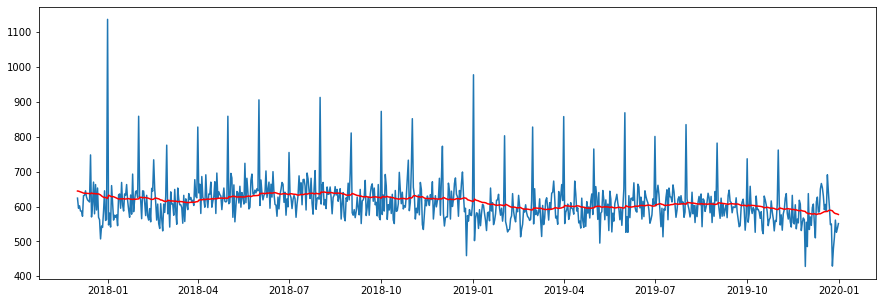

In [ ]:

predictions_df = pd.pivot_table(predictions_df, index=['DATE OCC'])
test1=pd.pivot_table(test1, index=['DATE OCC'])

plt.figure(figsize=(15,5)) 
plt.plot(test1)
plt.plot(predictions_df, color= 'red')
plt.show()

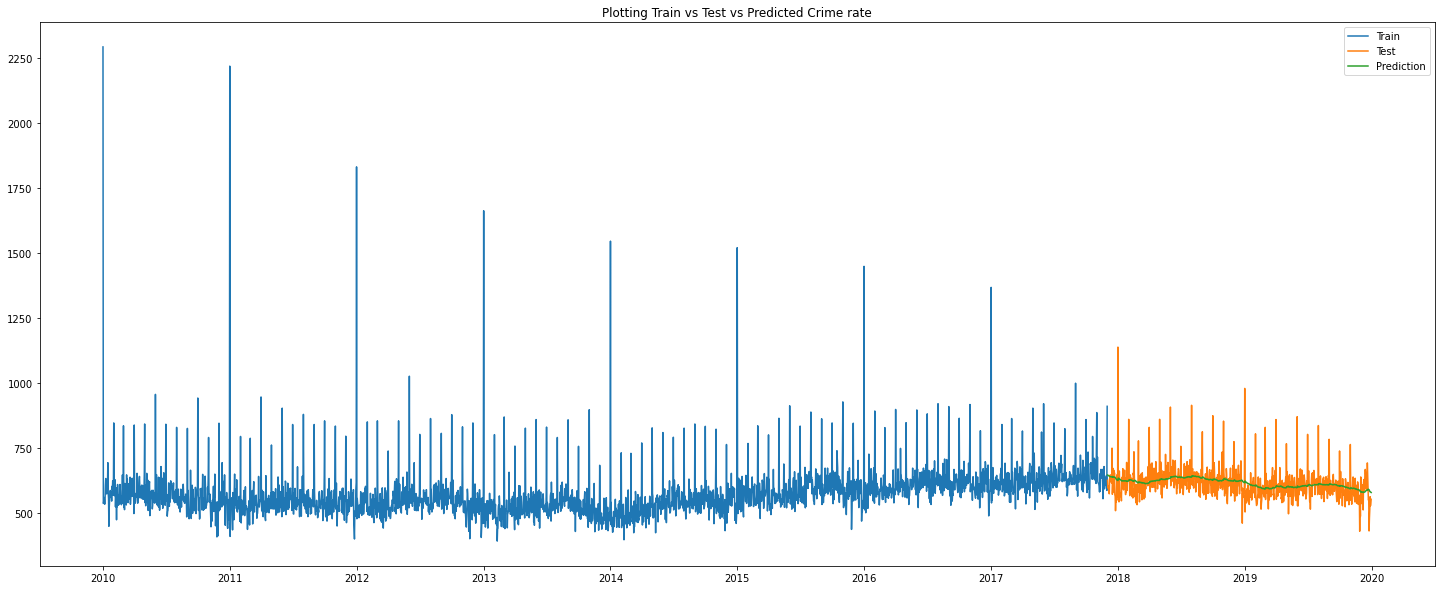

In [ ]:
train1=pd.pivot_table(train1, index=['DATE OCC'])
plt.figure(figsize=(25,10)) 
plt.plot(train1, label ='Train')
plt.plot(test['OCCURENCES'], label='Test',)
plt.plot(predictions_df, label='Prediction')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()